In [20]:
import pandas as pd
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.dummy import DummyClassifier

In [21]:
with open('GBmapper.pkl', 'rb') as open_file:
    mapper = pkl.load(open_file)

In [22]:
with open('observations.pkl', 'rb') as open_file:
    df = pkl.load(open_file)

In [23]:
with open('monday_SMOTE_best_estimator.pkl', 'rb') as open_file:
    est = pkl.load(open_file)

In [24]:
X = mapper.fit_transform(df)

In [25]:
y = df['funded']

In [26]:
dummy = DummyClassifier()
dummy.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [27]:
y_pred = est.predict(X)
y_dummy = dummy.predict(X)

In [28]:
confusion_matrix(y, y_pred)

array([[ 2125,  2049],
       [ 4900, 13683]])

In [29]:
confusion_matrix(y, y_dummy)

array([[  767,  3407],
       [ 3408, 15175]])

In [30]:
y_proba = est.predict_proba(X)[:,1]

<H2>SMOTE AUC</H2>

In [31]:
roc_auc_score(y, y_proba)

0.6926980123442086

In [32]:
cols = mapper.transformed_names_

In [33]:
imps = est.feature_importances_

In [34]:
import matplotlib.pyplot as plt

In [35]:
sorted_imps = sorted(list(zip(cols, imps)), key=lambda a: a[1], reverse=True)

In [36]:
import operator

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

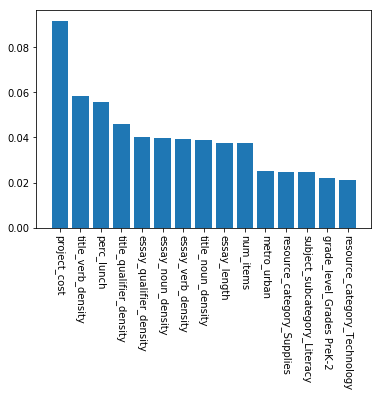

In [37]:
plt.bar([x[0] for x in sorted_imps[:15]], [x[1] for x in sorted_imps[:15]])
plt.xticks(rotation=-90)